## Loading Libraries and Dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
df = pd.read_csv('D:/DataScience/Heart_Disease/heart.csv')

## Feature Engineering and Pre-Processing

In [7]:
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
bins = [25,30,35,40,45,50,55,60,65,70,75,80]
labels = list(range(1,12))
df['ageGroup'] = pd.cut(df['age'], bins=bins,labels=labels)

## Feature Selection

In [28]:
x_cols = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'ageGroup']
y_col = 'target'

In [29]:
X = df[x_cols]
y = df[y_col]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [103]:
dt_model = DecisionTreeClassifier()

In [104]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
y_pred = dt_model.predict(X_test)

In [50]:
def cal_roc(y_pred,y_test):
    false_pos_rate,true_pos_rate,thr = roc_curve(y_test,y_pred)
    roc_auc = auc(false_pos_rate, true_pos_rate)
    return roc_auc

In [51]:
cal_roc(y_pred,y_test)

0.8389008620689655

In [126]:
def plot_roc(train,test,para):
    fig = plt.figure(figsize=(8,5))
    plt.plot(list(train_res.keys()),list(train_res.values()),label='Train AUC')
    plt.plot(list(test_res.keys()),list(test_res.values()),label='Test AUC')
    plt.ylabel('AUC score')
    plt.xlabel(para)
    plt.legend()
    plt.show()

In [41]:
dt_model.score(X_train,y_train),dt_model.score(X_test,y_test)

(1.0, 0.8360655737704918)

### Important Parameter
- max_depth
- min_samples_split
- min_sample_leaf
- max_feature
- criterion

## Max_Depth
- The maximum depth of the tree

In [73]:
depths = np.linspace(1,35,35,endpoint=True)
depths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

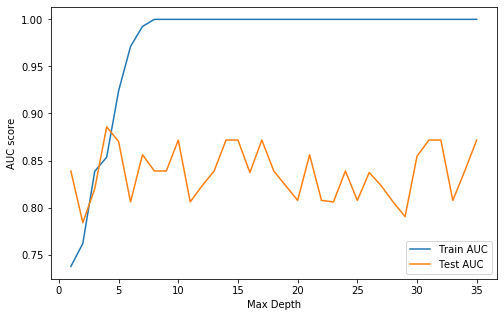

In [127]:
train_res = {}
test_res = {}
for val in depths:
    model = DecisionTreeClassifier(max_depth=val)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_res[val] = cal_roc(y1,y_train)
    test_res[val] = cal_roc(y2,y_test)
plot_roc(train_res,test_res,'Max Depth')

After depth = 8, we found that our tree model started to overfit. As for bigger value of depth, might lead to overfit the model

## Minimum Samples Split
- The minimum number of samples required to split an internal node

In [106]:
split_size = np.linspace(.1,1.,10,endpoint=True)
split_size

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

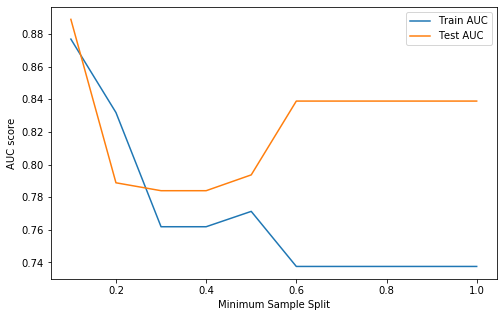

In [128]:
train_res = {}
test_res = {}
for val in split_size:
    model = DecisionTreeClassifier(min_samples_split=val)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_res[val] = cal_roc(y1,y_train)
    test_res[val] = cal_roc(y2,y_test)
plot_roc(train_res,test_res,'Minimum Sample Split')

We can see when we give all samples to split the node, it is not able to learn enough about the data. 

## Minimum Sample Leaf
- The minimum number of samples required to be at a leaf node.

In [110]:
splits_leaf = np.linspace(.1,0.5,5,endpoint=True)
splits_leaf

array([0.1, 0.2, 0.3, 0.4, 0.5])

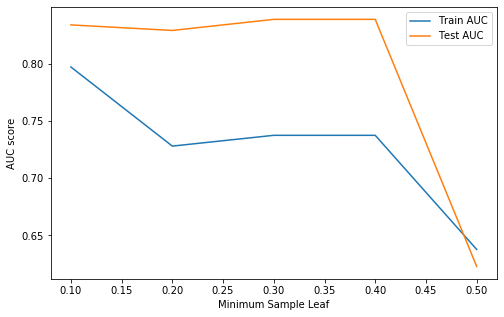

In [129]:
train_res = {}
test_res = {}
for val in splits_leaf:
    model = DecisionTreeClassifier(min_samples_leaf=val)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_res[val] = cal_roc(y1,y_train)
    test_res[val] = cal_roc(y2,y_test)
plot_roc(train_res,test_res,'Minimum Sample Leaf')

Also similar to pervious parameter, The more value of it, will lead to underfitting

## Max Feature
- The number of features to consider when looking for the best split
- Note : The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

In [119]:
feature = list(range(1,X_train.shape[1]))
feature

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

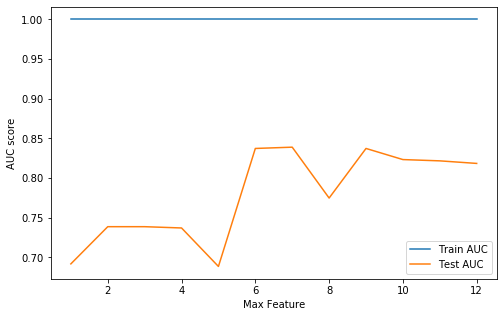

In [130]:
train_res = {}
test_res = {}
for val in feature:
    model = DecisionTreeClassifier(max_features=val)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_res[val] = cal_roc(y1,y_train)
    test_res[val] = cal_roc(y2,y_test)
plot_roc(train_res,test_res,'Max Feature')

This also is overfitting case, but it is unlikely that more every value of this, will lead to overfitting. For this kindly refer to point 2 in Note

## Criterion
- The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [123]:
criterion = ['gini','entropy']

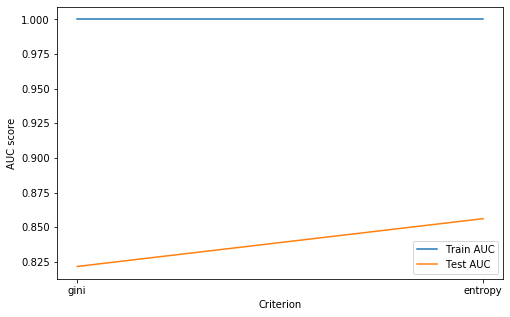

In [132]:
train_res = {}
test_res = {}
for val in criterion:
    model = DecisionTreeClassifier(criterion=val)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_res[val] = cal_roc(y1,y_train)
    test_res[val] = cal_roc(y2,y_test)
plot_roc(train_res,test_res,'Criterion')

Entropy has lead to somewhat higher value on test data